In [1]:
import numpy as np
import matplotlib.pyplot as plt

import functions

In [2]:
plt.style.use('ggplot')

In [3]:
# Ejercicio 5

In [4]:
def egauss(A: np.ndarray, b: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    '''
    Calcula la eliminación Gaussiana (sin pivoteo) de un sistema Ax = b.
    '''
    
    n = A.shape[0]
    U = A.copy()
    y = b.copy()

    for k in range(n-1):
        
        assert U[k, k] != 0, 'Error: Existe k en {0, 1, ..., n-2} tal que det(A_k) = 0.'

        v = U[k+1:, k] / U[k, k]
        U[k+1:, k] = 0
        U[k+1:, k+1:] = U[k+1:, k+1:] - np.outer(v, U[k, k+1:])
        y[k+1:] = y[k+1:] - y[k] * v

    return U, y

In [5]:
# TEST
n = 100

I = np.eye(n)
E = np.diag(np.ones(n-1), 1) + np.diag(np.ones(n-1), -1)
A = 2*I - E

b = np.random.random(n)

U, y = egauss(A, b)
x = functions.sol_trsupfil(U, y)
print('||A @ x - b|| =', np.linalg.norm(A @ x - b, ord=2))

||A @ x - b|| = 8.723589337723468e-13


In [6]:
# Ejercicio 6

In [7]:
def dlu(A: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    '''
    Calcula la descomposición LU (sin pivoteo) de una matriz A.
    '''

    n = A.shape[0]
    dLU = A.copy()

    for k in range(n-1):

        assert dLU[k, k] != 0, 'Error: Existe k en {0, 1, ..., n-2} tal que det(A_k) = 0.'

        dLU[k+1:, k] = dLU[k+1:, k] / dLU[k, k]
        dLU[k+1:, k+1:] = dLU[k+1:, k+1:] - np.outer(dLU[k+1:, k], dLU[k, k+1:])

    L = np.eye(n) + np.tril(dLU, -1)
    U = np.triu(dLU)

    return L, U 

In [8]:
# TEST
L, U = dlu(A)
print('||L @ U - A|| =', np.linalg.norm(L @ U - A, ord='fro'))

||L @ U - A|| = 1.5700924586837752e-16


In [9]:
# Ejercicio 7

In [10]:
def egauss_mod(A: np.ndarray, b: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    '''
    Calcula la eliminación Gaussiana (sin pivoteo) de un sistema Ax = b donde A es tal que 
    los únicos elementos que pueden ser no nulos son A[0, -1], A[-1, 0] y A[i, j] con |i - j| <= 1. 
    '''
    
    n = A.shape[0]
    U = A.copy()
    y = b.copy()

    for k in range(n-1):

        assert U[k, k] != 0, 'Error: Existe k en {0, 1, ..., n-2} tal que det(A_k) = 0.'
        
        v = U[[k+1, -1], k] / U[k, k]

        U[[k+1, -1], k] = 0
        U[np.ix_([k+1, -1], [k+1, -1])] = U[np.ix_([k+1, -1], [k+1, -1])] - np.outer(v , U[k, [k+1, -1]])

        y[np.ix_([k+1, -1])] = y[np.ix_([k+1, -1])] - y[k] * v

    return U, y

In [11]:
n = 1000

I = np.eye(n)
E = np.diag(np.ones(n-1), 1) + np.diag(np.ones(n-1), -1)
A = 2*I - E
A[0, -1] = 1
A[-1, 0] = 1

b = np.random.random(n)

In [12]:
%%time 
U, y = egauss_mod(A, b)

CPU times: user 19.4 ms, sys: 2.61 ms, total: 22 ms
Wall time: 21.8 ms


In [13]:
%%time 
U, y = egauss(A, b)

CPU times: user 651 ms, sys: 322 ms, total: 973 ms
Wall time: 1.03 s


In [14]:
# Ejercicio 9

In [15]:
def egaussp(A: np.ndarray, b: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    '''
    Calcula la eliminación Gaussiana (con pivoteo parcial) de un sistema Ax = b.
    '''
    
    n = A.shape[0]
    U = A.copy()
    y = b.copy()

    for k in range(n-1):

        l = k + np.argmax(abs(U[k:, k]))

        if U[l, k] != 0:

            U[[k, l]] = U[[l, k]]
            y[[k, l]] = y[[l, k]]

            v = U[k+1:, k] / U[k, k]
            U[k+1:, k] = 0
            U[k+1:, k+1:] = U[k+1:, k+1:] - np.outer(v, U[k, k+1:])
            y[k+1:] = y[k+1:] - y[k] * v
            
    return U, y


def dlup(A: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    '''
    Calcula la descomposición LU (con pivoteo parcial) de una matriz A.
    '''
    
    n = A.shape[0]
    dLU = A.copy()
    P = np.eye(n)

    for k in range(n-1):

        l = k + np.argmax(abs(dLU[k:, k]))

        if dLU[l, k] != 0:

            dLU[[k, l]] = dLU[[l, k]]
            P[[k, l]] = P[[l, k]]

            dLU[k+1:, k] = dLU[k+1:, k] / dLU[k, k]
            dLU[k+1:, k+1:] = dLU[k+1:, k+1:] - np.outer(dLU[k+1:, k], dLU[k, k+1:])

    L = np.eye(n) + np.tril(dLU, -1)
    U = np.triu(dLU)

    return L, U, P       

In [16]:
# Ejercicio 10

In [17]:
def sol_egauss(A: np.ndarray, b: np.ndarray) -> np.ndarray:
    '''
    Resuelve el sistema lineal Ax = b con A no singular.
    '''

    U, y = egaussp(A, b)
    x = functions.sol_trsupfil(U, y)

    return x

In [18]:
A = np.array([[2, 10, 8, 8, 6], [1, 4, -2, 4, -1], [0, 2, 3, 2, 1], [3, 8, 3, 10, 9], [1, 4, 1, 2, 1],], dtype=float)
b1 = np.array([52, 14, 12, 51, 15], dtype=float)
b2 = np.array([50, 4, 12, 48, 12], dtype=float)

print('A =')
print(A)
print('b1 =', b1)
print('b2 =', b2)

A =
[[ 2. 10.  8.  8.  6.]
 [ 1.  4. -2.  4. -1.]
 [ 0.  2.  3.  2.  1.]
 [ 3.  8.  3. 10.  9.]
 [ 1.  4.  1.  2.  1.]]
b1 = [52. 14. 12. 51. 15.]
b2 = [50.  4. 12. 48. 12.]


In [19]:
x1 = sol_egauss(A, b1)

print('x1 =', x1)
print('||A @ x1 - b1|| =', np.linalg.norm(A @ x1 - b1, ord=2))

x1 = [1. 2. 1. 2. 1.]
||A @ x1 - b1|| = 1.0658141036401503e-14


In [20]:
x2 = sol_egauss(A, b2)

print('x2 =', x2)
print('||A @ x2 - b2|| =', np.linalg.norm(A @ x2 - b2, ord=2))

x2 = [2. 1. 2. 1. 2.]
||A @ x2 - b2|| = 2.8435583831733384e-15


In [21]:
# Ejercicio 11

In [22]:
def inv_lu(A: np.ndarray) -> np.ndarray:
    '''
    Calcula la matriz inversa de una matriz A utilizando descomposición LU con pivoteo parcial.
    '''

    n = A.shape[0]
    L, U, P = dlup(A)
    X = np.zeros((n, n))

    for j in range(n):

        # Resuelve L @ y = P @ e^j
        y = functions.sol_trinffil(L, P[:, j])
        # Resuelve U @ x^j = y
        X[:, j] = functions.sol_trsupfil(U, y)

    return X

In [23]:
n = A.shape[0]
X = inv_lu(A)
I = np.eye(n)

print('||A @ X - I|| =',np.linalg.norm(A @ X - I))

||A @ X - I|| = 1.6687357476335705e-14


In [24]:
# Ejercicio 13

In [25]:
def det_lu(A: np.ndarray) -> float:
    '''
    Calcula el determinante de una matriz A utilizando descomposición LU con pivoteo parcial.
    '''

    _, U, _ = dlup(A)
    det = np.prod(np.diag(U))

    return det

In [26]:
%%time
det = det_lu(A)
print('det(A) =', det)

det(A) = 23.999999999999982
CPU times: user 1.12 ms, sys: 1.01 ms, total: 2.13 ms
Wall time: 1.55 ms


In [27]:
%%time
det = np.linalg.det(A)
print('det(A) =', det)

det(A) = 24.000000000000014
CPU times: user 144 µs, sys: 129 µs, total: 273 µs
Wall time: 270 µs


In [28]:
# Ejercicio 15

In [29]:
def circumference(p1, p2, p3):
    '''
    Dado tres puntos no colineales en el plano (p1 = (x1, x2), p2 = (y1, y2) y p3 = (z1, z2)) la función
    realiza el gráfico de aquella circunferencia que pasa por los tres puntos dados.
    '''

    A = np.array([
        [p1[0], p1[1], 1],
        [p2[0], p2[1], 1],
        [p3[0], p3[1], 1],
    ], dtype=np.float64)

    b = - np.array([sum(p1**2), sum(p2**2), sum(p3**2) ], dtype=np.float64)

    d, e, f = sol_egauss(A, b)
    r = np.sqrt((d**2 + e**2) / 4 - f)
    X = np.linspace(0, 2 * np.pi, 100)

    x1 = r * np.cos(X) - d / 2
    x2 = r * np.sin(X)  - e / 2

    fig, ax = plt.subplots()
    plt.plot(x1, x2)
    plt.plot(p1[0], p1[1], marker ="o")
    plt.plot(p2[0], p2[1], marker ="o")
    plt.plot(p3[0], p3[1], marker ="o")
    plt.axis('equal')
    plt.grid(True)
    plt.show()

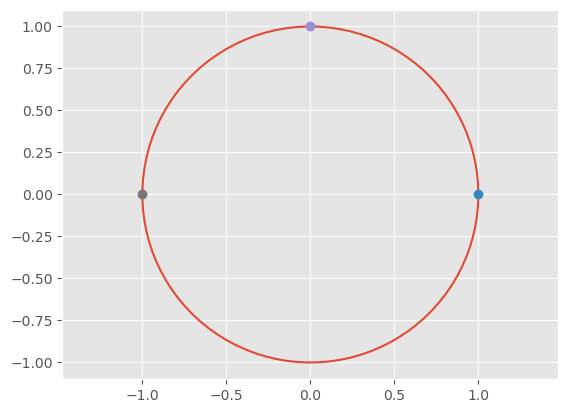

In [30]:
p1 = np.array([1, 0])
p2 = np.array([0, 1])
p3 = np.array([-1, 0])

circumference(p1, p2, p3)